## Interpolação de Lagrange e Newton
### Disciplina de Algoritmos Numéricos - 2021/1
#### Aluno: Thiago Rodrigues Gouveia da Silva


##### Esse notebook tem o intuito de apresentar alguns dos algoritmos de interpolação:
1.  Lagrange
2.  Newton

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline

In [31]:
def polinomioLagrange(n,x,y,z):
    resultado = 0
    for i in range(n):
        p = 1
        for j in range(n):
            if i != j:
                p = p * (z - x[j])/(x[i] - x[j])
        
        resultado = resultado + p * y[i]
       
    return resultado

In [32]:
def polinomioNewton(n, x, y, xi):
    coef = np.zeros([n, n])
    
    coef[:,0] = y
    
    #diferença dividida
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
    
    coef = coef[0, :]
    n = n - 1 
    P = coef[n]
    
    #encontrando a interpolação para xi
    for k in range(1, n+1):
        P = coef[n-k] + (xi -x[n-k]) * P
    
    return P

#### Usuário deve escolher o grau e os valores de x e y

In [33]:
n = int(input("Selecione o grau do seu polinômio: "))
     
x = np.zeros(n)
y = np.zeros(n)

for i in range(n):
    print("x(",i,"):")
    x[i] = input()
    print("y(",i,"):")
    y[i] = input()

Selecione o grau do seu polinômio: 3
x( 0 ):
1
y( 0 ):
2
x( 1 ):
4
y( 1 ):
3
x( 2 ):
23
y( 2 ):
2


### Usuário deve escolher entre os dois métodos.
##### Se escolher de Lagrange seleciona xi, faz o método de interpolação e retorna o P(x)
##### Se escolher de Newton seleciona a quantidade de pontos, e pergunta ao usuário os pontos. Ao final, constroi o dataframe com x e p(x)

In [37]:
escolha = input("Escolha entre Lagrange e Newton\n")

if(escolha == 'Lagrange'):
    xi = float(input("Selecione um x para P(x): "))
    P = polinomioLagrange(n, x, y, xi)
    
    x_series = pd.Series(x)
    y_series = pd.Series(y)
    df = pd.concat([x_series, y_series], axis=1)
    df.columns = ['X', 'Y']
    print(df)
    print("P: ",P)
elif(escolha == 'Newton'):
    quantidadePontos = int(input("Quantos pontos deseja adicionar: "))
    xi = np.zeros([quantidadePontos])
    
    for i in range(quantidadePontos):
        xi[i] = float(input("Selecione um x para P(x): "))
    
    
    P = polinomioNewton(n, x, y, xi)
    x_series = pd.Series(xi)
    p_x = pd.Series(P)
    df = pd.concat([x_series, p_x], axis=1)
    df.columns = ['X', 'P(x)']
    print(df)
else:
    sys.exit("Método escolhido não existe")

Escolha entre Lagrange e Newton
Lagrange
Selecione um x para P(x): 4
      X    Y
0   1.0  2.0
1   4.0  3.0
2  23.0  2.0
P:  3.0


#### Plotagem dos pontos:

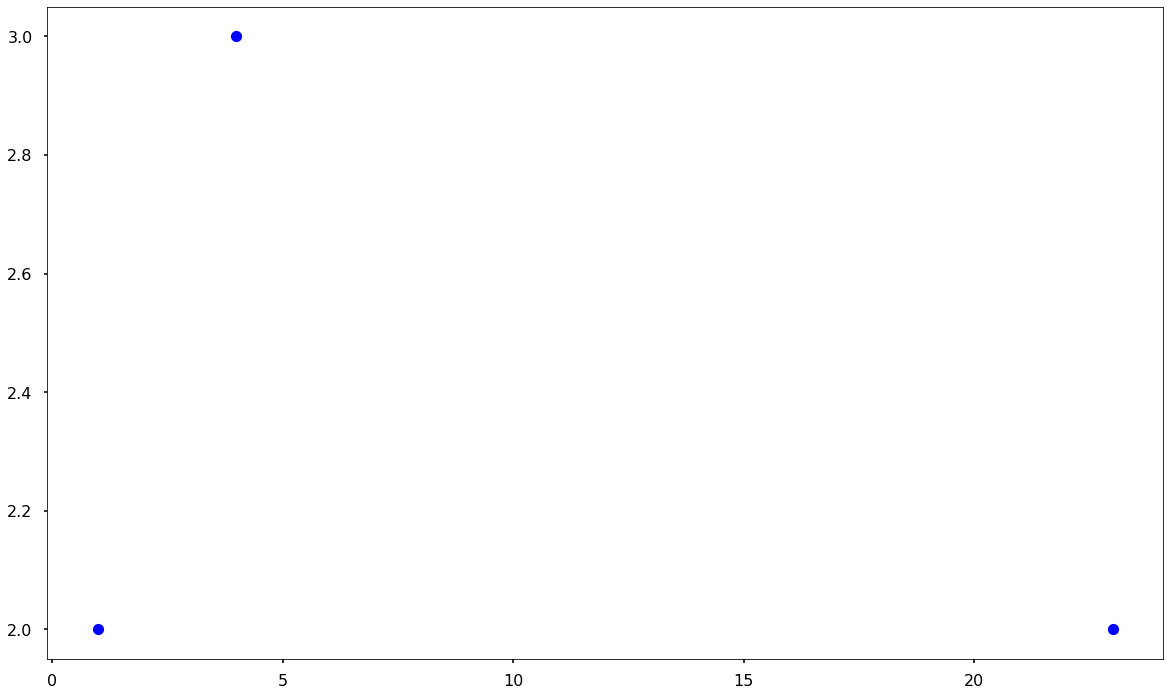

In [38]:
plt.figure(figsize = (20, 12))
plt.plot(x, y, 'bo')
plt.plot(xi, P, color='red')